At its core, the Prophet procedure is an additive regression model with four main components:

A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
A yearly seasonal component modeled using Fourier series.
A weekly seasonal component using dummy variables.
A user-provided list of important holidays.
https://facebook.github.io/prophet/docs/quick_start.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
# data = pd.read_csv("/Users/loukas/Downloads/GOOG.csv") 
data = pd.read_csv(r"GOOG.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723545e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.637794e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [7]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

In [6]:
%matplotlib inline

<Figure size 864x864 with 0 Axes>

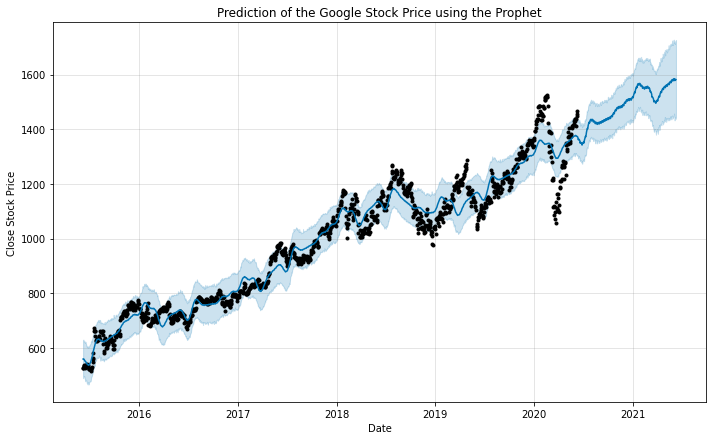

In [10]:
# Plot
plt.figure(figsize=(12,12))
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [25]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
fig = plot_plotly(m, prediction)  # This returns a plotly Figure
# py.iplot(fig,image_width=800, image_height=600,image='png')
fig.show(renderer="colab")

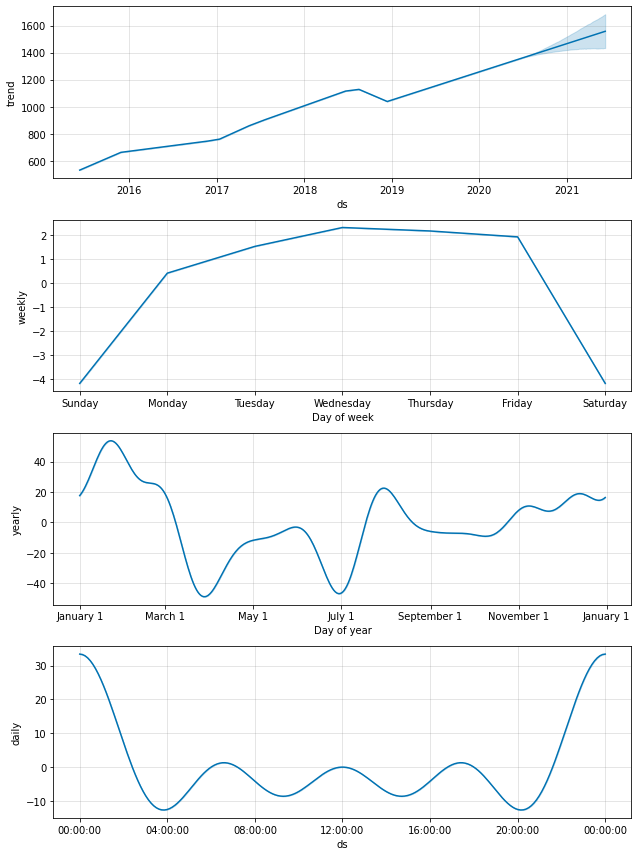

In [11]:
m.plot_components(prediction)
plt.show()

In [14]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2017-06-21 00:00:00 and 2019-06-11 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-22,959.413414,935.687195,982.517913,957.090027,2017-06-21
1,2017-06-23,959.720876,937.006967,981.937218,965.590027,2017-06-21
2,2017-06-26,963.043214,940.312118,987.604508,952.270020,2017-06-21
3,2017-06-27,965.515833,942.760594,988.961823,927.330017,2017-06-21
4,2017-06-28,968.339535,944.903604,991.511163,940.489990,2017-06-21


In [15]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,4638.782959,68.108611,56.275842,0.053686,0.050426,0.368000
1,38 days,4815.430806,69.393305,57.606851,0.054713,0.051335,0.356000
2,39 days,5016.359610,70.826264,58.920345,0.055733,0.051794,0.348000
3,40 days,5379.611515,73.345835,60.551245,0.057388,0.051794,0.344000
4,41 days,5672.847536,75.318308,61.640522,0.058585,0.051335,0.341333


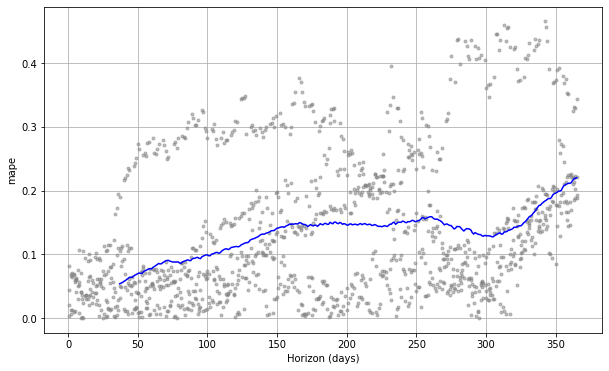

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')